## Implement an LSTM Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [68]:
# Generate synthetic sequential data
torch.manual_seed(42)
sequence_length = 10
num_samples = 100

# Create a sine wave dataset
X = torch.linspace(0, 4 * 3.14159, steps=num_samples).unsqueeze(1)
y = torch.sin(X)

In [69]:
def create_in_out_sequences(sequence, sequence_length):
    '''Create auto-regressive sequences
    Args:
    sequence: 1D tensor of size ([N, 1]), N is the number of data points 
    sequence_length: int
    
    Returns:
    input sequence: tensor of size ([])
    output sequence: tensor of size ([])
    '''
    in_seq, out_seq = [], []
    
    for i in range(len(sequence)-sequence_length):
        # print(y[i:i+sequence_length].shape)
        in_seq.append(sequence[i:i+sequence_length])
        out_seq.append(sequence[i + sequence_length])
        
    return torch.stack(in_seq), torch.stack(out_seq)


In [70]:
X_seq, y_seq = create_in_out_sequences(y, sequence_length)
print(f" input = {y.shape},\n in_sequence = {X_seq.shape},\n out_seq = {y_seq.shape}")


 input = torch.Size([100, 1]),
 in_sequence = torch.Size([90, 10, 1]),
 out_seq = torch.Size([90, 1])


In [131]:
class CustomLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        weights_biases_init = lambda : (nn.Parameter(torch.randn(input_dim, hidden_units)),
                                        nn.Parameter(torch.randn(hidden_units, hidden_units)),
                                        nn.Parameter(torch.zeros(hidden_units)))
        self.input_dim = input_dim
        self.hidden_units = hidden_units
        self.Wxi, self.Whi, self.bi = weights_biases_init()
        self.Wxf, self.Whf, self.bf = weights_biases_init()
        self.Wxo, self.Who, self.bo = weights_biases_init()
        self.Wxc, self.Whc, self.bc = weights_biases_init()
        self.fc = nn.Linear(hidden_units, 1)
        # print(self.Wxi.shape, self.Whi.shape, self.bi.shape)
        
    def forward(self, inputs, H_C=None):
        # print(inputs.shape, self.Wxi.shape)
        batch_size, seq_len, _ = inputs.shape
        if not H_C:
            H = torch.randn(batch_size, self.hidden_units)
            C = torch.randn(batch_size, self.hidden_units)
        else:
            H, C = H_C
            
        all_hidden_states = []
        for t in range(seq_len):  
            X_t = inputs[:, t, :]
            # print(X.shape, self.Wxi.shape, self.Whi.shape, self.bi.shape)  
            I_t = torch.sigmoid(torch.matmul(X_t, self.Wxi) + torch.matmul(H, self.Whi) + self.bi)
            F_t = torch.sigmoid(torch.matmul(X_t, self.Wxf) + torch.matmul(H, self.Whf) + self.bf)
            O_t = torch.sigmoid(torch.matmul(X_t, self.Wxo) + torch.matmul(H, self.Who) + self.bo)
            C_tilde = torch.tanh(torch.matmul(X_t, self.Wxc) + torch.matmul(H, self.Whc) + self.bc)
            C = F_t * C + I_t * C_tilde
            H = O_t * torch.tanh(C)
            # print(H.shape)
            all_hidden_states.append(H.unsqueeze(1))
            
        outputs = torch.cat(all_hidden_states, dim=1)
        pred = self.fc(outputs)
        print(pred.shape)
        return pred, (H, C)
        
    

In [132]:
# Define the LSTM Model
class LSTMModel_inbuilt(nn.Module):
    def __init__(self):
        super(LSTMModel_inbuilt, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        print(x.shape)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last output of the LSTM
        return out

In [133]:
criterion = nn.MSELoss()
model = CustomLSTMModel(1, 50)
# print(model.state_dict().keys())
# model_inbuilt = LSTMModel_inbuilt()
optimizer = optim.Adam(model.parameters(), lr=0.01)
print(X_seq.shape, y_seq.shape)

torch.Size([90, 10, 1]) torch.Size([90, 1])


In [135]:
epochs = 500
for epoch in range(epochs):
    state = None
    pred, state = model(X_seq, state)
    loss = criterion(pred[:, -1, :], y_seq)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f"Loss: {loss.item()}")

torch.Size([90, 10, 1])
Loss: 0.6185386180877686
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
torch.Size([90,

torch.Size([90, 10, 1])
torch.Size([90, 10, 1])
(90, 10)


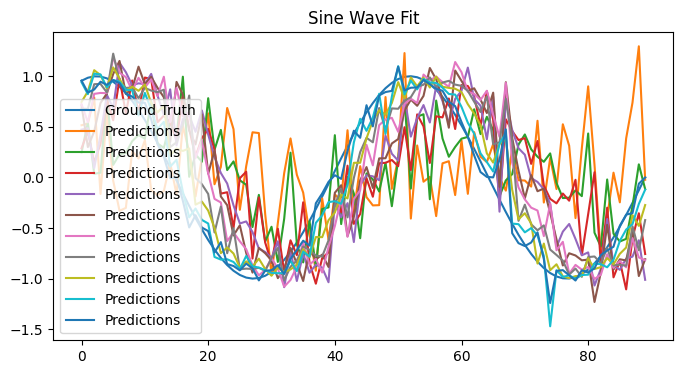

In [136]:
# Convert to numpy for plotting
with torch.no_grad():
    pred_for_vis,_ = model(X_seq) 
print(pred_for_vis.shape)

pred_np = pred_for_vis.squeeze(-1).squeeze(-1).detach().cpu().numpy() 
print(pred_np.shape)
y_np   = y_seq.squeeze(-1).squeeze(-1).detach().cpu().numpy()

plt.figure(figsize=(8, 4))
plt.plot(y_np, label='Ground Truth')
plt.plot(pred_np, label='Predictions')
plt.title("Sine Wave Fit")
plt.legend()
plt.show()

In [137]:

def create_in_out_sequences(data, seq_length):
    in_seq = []
    out_seq = []
    for i in range(len(data) - seq_length):
        in_seq.append(data[i:i + seq_length])
        out_seq.append(data[i + seq_length])
    return torch.stack(in_seq), torch.stack(out_seq)
# Testing on new data
test_steps = 20  # Ensure this is greater than sequence_length
X_test = torch.linspace(4 * 3.14159, 5 * 3.14159, steps=test_steps).unsqueeze(1)
y_test = torch.sin(X_test)

# Create test input sequences
X_test_seq, _ = create_in_out_sequences(y_test, sequence_length)

with torch.no_grad():
    predictions = model_inbuilt(X_test_seq)
    print(f"Predictions for new sequence: {predictions.squeeze().tolist()}")


torch.Size([10, 10, 1])
Predictions for new sequence: [1.0431958436965942, 1.0211113691329956, 0.9714934229850769, 0.8951110243797302, 0.7933524250984192, 0.6683526635169983, 0.5232558846473694, 0.3624460995197296, 0.19146664440631866, 0.016427263617515564]
